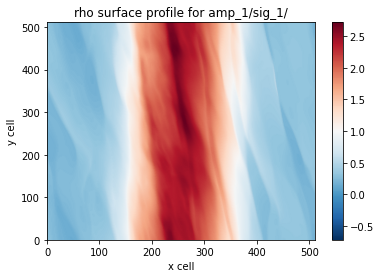

[[0.3042467  0.30289382 0.30128035 ... 0.20059107 0.19378881 0.19137152]
 [0.30364335 0.3022536  0.30060583 ... 0.19988649 0.19364528 0.19156414]
 [0.30302548 0.3015934  0.2999203  ... 0.19922647 0.19354421 0.19176257]
 ...
 [0.30598262 0.3046987  0.303194   ... 0.20294389 0.19444177 0.19086917]
 [0.3054163  0.30411327 0.30257872 ... 0.20212312 0.19419084 0.19102028]
 [0.304837   0.30351233 0.30194065 ... 0.20133723 0.19397257 0.19118863]]


In [10]:
import sys
sys.path.append('~/athena-public-version/vis/python/')
#sys.path.append('~/.local/lib/python3.8/site-packages/')
sys.path.append('~/working')


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#IMPORT APPROPRIATE ATHINPUT FILE
#import athinput.hgb as athin
import athena_read

def surface_profile(file_name,data_name):
    #print('current file is :'+file_name)
    title=file_name[10:-20]
    title = data_name + ' surface profile for ' +title
    data = athena_read.athdf(file_name)
    #for 8x8x1 scale height box, with cubic cells, needs to be adjusted for other sizes
    side_length = 1/len(data['x3v'])
    #print(side_length,' side length')
    volume = side_length**3
    #print(volume,' volume')
    
    #constants
    omega0 = 1.0
    qshear = 1.5
    Nx = len(data['x1v'])
    Ny = len(data['x2v'])
    Nz = len(data['x3v'])
    
    #assuming 64x256x256, but should work for any 
    overall_length = Nx*Ny*Nz
    data_arr = []
    #array of vshear possible values
    vsh = -qshear*omega0*data['x1v']
    vsh_3d = np.broadcast_to(vsh,(Nz,Ny,Nx))
    data_arr = data[data_name]
    if data_name == 'vel2':
        data_arr = data_arr-vsh_3d
    data_arr = np.sum(data_arr,axis=(0))
    radial_dim = data['x1f'][-1]-data['x1f'][0]
    div_vol = radial_dim*side_length
    #divide by number of cells in vertical slice
    data_arr = data_arr/(Nz)
    #print(np.shape(data_arr))

    #plotting section
    plt.pcolormesh(data_arr,norm=mpl.colors.CenteredNorm(vcenter =1),shading = 'gouraud',cmap = 'RdBu_r')
    plt.colorbar()
    plt.xlabel('x cell')
    plt.ylabel('y cell')
    plt.title(title)
    plt.show()
    return(data_arr)

print(surface_profile('./ad_prof/amp_1/sig_1/HGB.out2.00100.athdf','rho'))


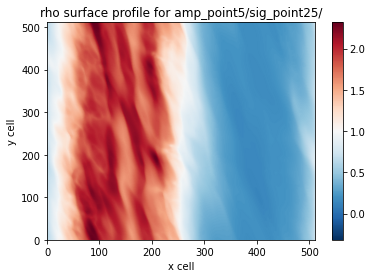

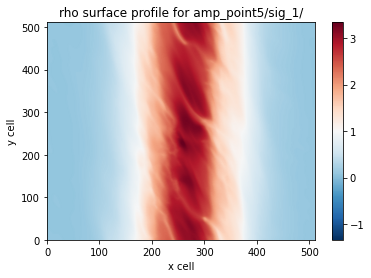

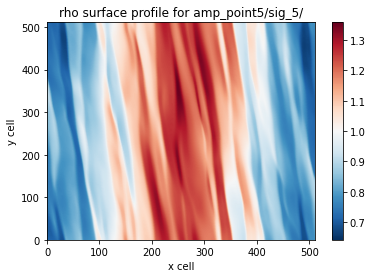

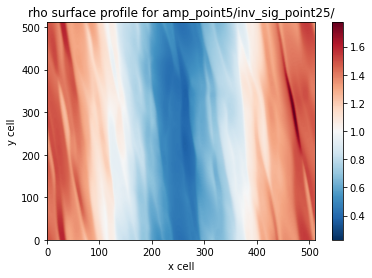

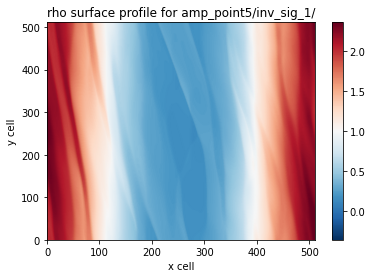

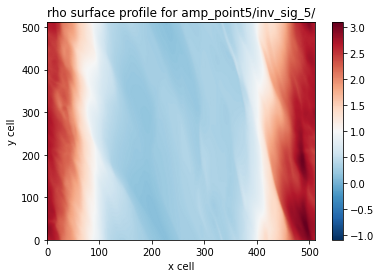

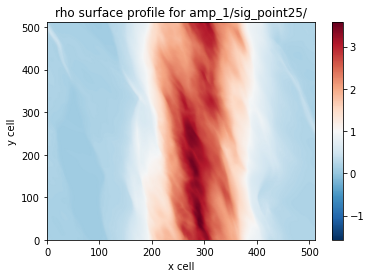

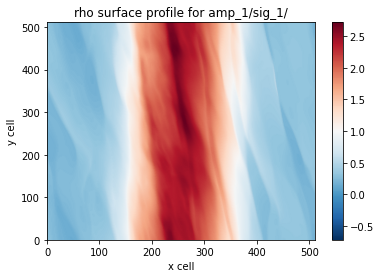

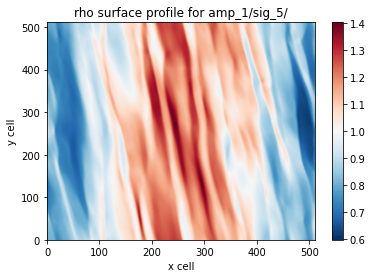

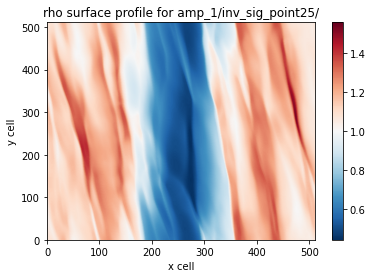

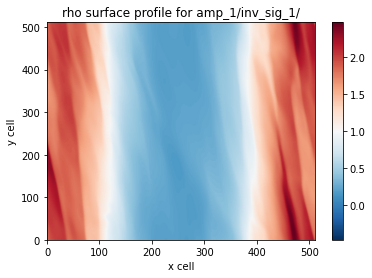

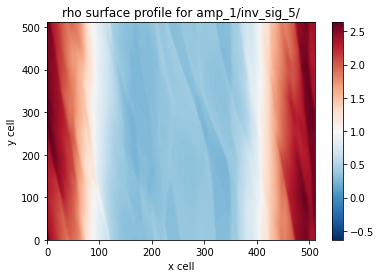

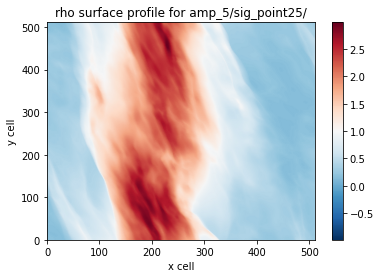

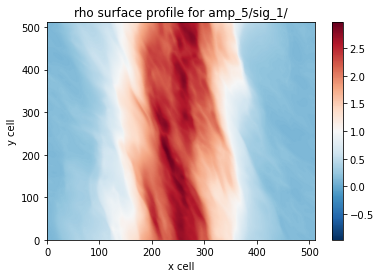

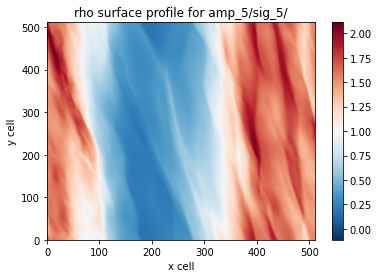

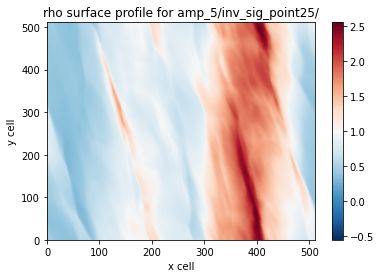

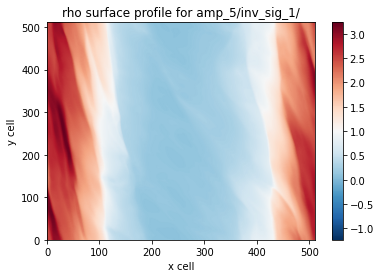

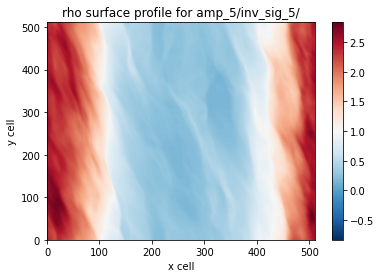

Run time is  37.22325396537781  seconds


In [11]:
import time
file_name_list = [
    "./ad_prof/amp_point5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_point5/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_1/inv_sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/sig_5/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_point25/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_1/HGB.out2.00100.athdf",
    "./ad_prof/amp_5/inv_sig_5/HGB.out2.00100.athdf"
]

start= time.time()
for file_name in file_name_list:
    x = surface_profile(file_name,'rho')
print('Run time is ',(time.time()-start),' seconds' )